# **01. Representació Molecular amb `RDKit`**

<img src="https://www.rdkit.org/docs/_static/logo.png" 
width="120" align="right">

[**RDKit**](https://www.rdkit.org/docs/GettingStartedInPython.html) és una llibreria de Python que permet identificar les molècules com a objectes. A partir d'aquí, podem modificar el format de les molècules, visualitzar-les, calcular propietats, etc. Per tant, és una eina molt utilitzada en química computacional. 

Per tal d'instal·lar RDKit:
+ Windows: obrirem la terminal "Anaconda Prompt (Anconda 3) i copiarem la següent línia de codi: 
```python
   conda install -c rdkit rdkit
```

+ Ubuntu: a una terminal normal (potser hem de posar el path fins a l'arxiu conda) copiarem la següent línia de codi: 
```python
conda install -c rdkit rdkit
```

+ Si tens Python 3.8, instal·lar-ho d'aquesta manera et pot portar problemes degut a que és incompatible (fins al moment Gener 2021), i per tant, és millor fer servir la següent línia de codi:
```python
conda install –c conda-forge rdkit 
```
***

Aquesta llibreria té [rdkit subpackages](https://rdkit.org/docs/source/rdkit.html#submodules) que permeten treballar funcions determinades. Així depenent del nostre objectiu, haurem d'importar un subpaquet determinat que contigui la funció que desitgem. 

Si voleu aprendre una mica més i tenir més informació podeu seguir el tutorial amb diferents exemples: [Getting Started with the RDKit in Python](http://www.rdkit.org/docs/GettingStartedInPython.html)

# 1.1 Importació de mòdul i descàrrega de molècules

Treballarem la molècula de l'amoxicil·lina, un antibiòtic de la família de les penicil·lines que s'utilitza per a tractar un gran nombre d'infeccions. 

En primer lloc, descarregarem la molècula `amoxicillin` de la base de dades de [Drugbank](https://go.drugbank.com/drugs/DB01060) en diferents formats, però correspondran al mateix fàrmac

- Descarrega el `MOL` i guarda-ho en un arxiu de text anomenat `amoxicillin.mol`

- Descarrega el `sdf 3D` i guarda-ho en un arxiu de text anomenat `amoxicillin.sdf`

- Còpia el `smiles`

En segon lloc, descarregarem els subpaquets de `RDKit` que farem servir a l'script:

In [1]:
#Importar moduls
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole 
#Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions 

# 1.2 Input de Molècules

`RDKit` permet llegir les mòlecules en tots els formats més habituals (smiles, sdf, mol, inchi o inchikey). Definirà cada molècula com un objecte, per tant, podem aplicar a les molècules les estructures i funcions habituals de python: crear llistes i diccionaris, comptar elements, iterar, etc.. 

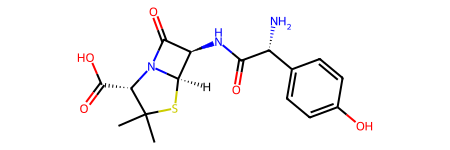

In [2]:
#Podem llegir molècules dibuixades a partir de SMILES
amox_1d = Chem.MolFromSmiles('[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)[C@H](N)C1=CC=C(O)C=C1)C(O)=O') 
amox_1d

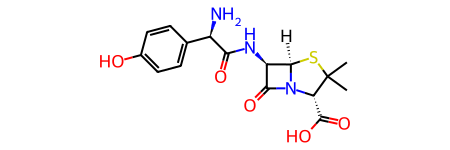

In [3]:
#Podem llegir arxius que contenen una única molècula
amox_2d = Chem.MolFromMolFile('./amoxicillin.mol')
amox_2d

> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> Els arxius `SDF` acostumen a tenir un conjunt de molècules. En conseqüència, RDKit els llegeix com una llista, a la qual haurem d'iterar per aplicar les mateixes funcions a cadascuna d'elles. A més, un avantatge de treballar amb `SDF` és que poden contenir molta informació de les molècules emmagatzemat al mateix fitxer.  

In [4]:
#Podem llegir arxius que contenen un conjunt de molècules
amox_3d = Chem.SDMolSupplier('./amoxicillin.sdf')
amox_3d 

In [5]:
# Els sdf són considerats llistes i per tant, podem aplicar les mateixes funcions
print("Nombre de molècules a l'arxiu SDF:", len(amox_3d))

Nombre de molècules a l'arxiu SDF: 1


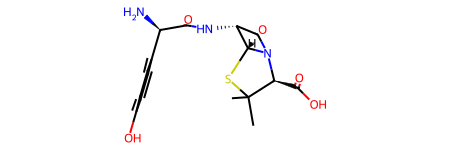

[None]

In [6]:
# Fer servir List Comprehension per a aplicar una funció a cada molècula

"""La funció display mostra l'estructura de la molécula (imatge)"""
[display(mol) for mol in amox_3d]

In [7]:
"""La funció MolToMolBlock mostra el format MOL que inclou les coordenades i el tipus d'element de cada àtom"""
for mol in amox_3d:
    print(Chem.MolToMolBlock(mol))

33613
     RDKit          3D

 25 27  0  0  1  0  0  0  0  0999 V2000
    0.8127   -0.5305    1.0470 S   0  0  0  0  0  0  0  0  0  0  0  0
    2.5412    1.9384   -2.1377 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.1164   -1.8059   -0.0667 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.3753   -0.4801    1.6331 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1798    2.4440    1.6021 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1594   -3.4891    0.0834 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7863    0.7498   -0.1147 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1496    1.9689   -0.4201 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5725    2.8271    0.2755 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.8063    1.0059    0.9417 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.8293   -1.4420   -0.2179 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1210   -0.6204   -0.4284 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.2349    2.1188    0.0479 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.2954    1.6814

# 1.3 Conversió de Formats de Molècules

RDKit permet emmagatzemar les molècules segons el nostre interès, per tant, podrem convertir una molècula als diferents formats més habituals (smiles, sdf, mol, inchi o inchikey).

+ **Passar de MOL a INCHI**

In [8]:
inchi = Chem.MolToInchi(amox_2d)
print ("INCHI:", inchi)

INCHI: InChI=1S/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(22)10(14(19)25-16)18-12(21)9(17)7-3-5-8(20)6-4-7/h3-6,9-11,14,20H,17H2,1-2H3,(H,18,21)(H,23,24)/t9-,10-,11+,14-/m1/s1


+ **Passar de MOL a SMILE**

In [9]:
print ("SMILES:", Chem.MolToSmiles(amox_2d))

SMILES: CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O


+ **Passar d'INCHI a INCHIKEY**

In [10]:
inchikey = Chem.InchiToInchiKey(inchi)
print ("InChIKey:", inchikey)

InChIKey: LSQZJLSUYDQPKJ-NJBDSQKTSA-N


> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> Recorda que per a fer servir el SDF haurem d'iterar sobre cada una de les molècules o bé indicar la posició a la llista de la molècula d'interès

In [11]:
for mol in amox_3d:
    print("INCHI:", Chem.MolToInchi(mol), "\n")
    print("INCHIKEY:", Chem.MolToInchiKey(mol), "\n")
    print("SMILES:", Chem.MolToSmiles(mol), "\n")

INCHI: InChI=1S/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(22)10(14(19)25-16)18-12(21)9(17)7-3-5-8(20)6-4-7/h3-6,9-11,14,20H,17H2,1-2H3,(H,18,21)(H,23,24)/t9-,10-,11+,14-/m1/s1 

INCHIKEY: LSQZJLSUYDQPKJ-NJBDSQKTSA-N 

SMILES: CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O 



In [12]:
print("INCHI:", Chem.MolToInchi(amox_3d[0]), "\n")
print("INCHIKEY:", Chem.MolToInchiKey(amox_3d[0]), "\n")
print("SMILES:", Chem.MolToSmiles(amox_3d[0]), "\n")

INCHI: InChI=1S/C16H19N3O5S/c1-16(2)11(15(23)24)19-13(22)10(14(19)25-16)18-12(21)9(17)7-3-5-8(20)6-4-7/h3-6,9-11,14,20H,17H2,1-2H3,(H,18,21)(H,23,24)/t9-,10-,11+,14-/m1/s1 

INCHIKEY: LSQZJLSUYDQPKJ-NJBDSQKTSA-N 

SMILES: CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O 



# 1.4 Calcular i Analitzar les Propietats de les Molècules

### **Calcular propietats físico-químiques**

+ **Comptar el nombre d'àtoms: `GetNumAtoms()`** 

In [13]:
print("Nombre d'àtoms d'una molècula:", amox_1d.GetNumAtoms())

Nombre d'àtoms d'una molècula: 25


+ **Calcular el pes molecular (MW): `MolWt`** 

In [14]:
print("Pes Molecular (Daltons):", Descriptors.MolWt(amox_1d))

Pes Molecular (Daltons): 365.41100000000006


+ **Calcular la lipofilicitat, fent servir el LogP: `MolLogP`**

In [15]:
print("LogP:", Chem.Crippen.MolLogP(amox_1d))

LogP: 0.023700000000000554


### **Emmagatzermar les propietats**

Els arxius `SDF` poden contenir un conjunt de propietats emmagatzemades per a cada molècula. Aquesta informació ens permet filtrar un arxiu simplement consultant el contingut del camp d'interès. 

En RDKit podem crear, consultar o eliminar les propietats mitjançant els mètodes següents:

- `GetProp`: Retorna el valor d'una propietat emmagatzemada

- `SetProp`: Estableix una nova propietat

- `HasProp`: Consulta si una determinada propietat ha estat assignada a una molècula

+ **Establir un nom a la molècula**

In [16]:
amox_1d.SetProp("_Name","Amoxicillin")
print(Chem.MolToMolBlock(amox_1d))

Amoxicillin
     RDKit          2D

 25 27  0  0  0  0  0  0  0  0999 V2000
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2760    0.0000    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6933   -1.9635    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2158   -2.5838    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4958    2.1766    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8323    2.8576    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0692    2.6401    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6118    3.9766    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.1097    4.0551    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9267    2.7971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7907    

+ **Establir una sèrie de propietats**

> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> Els valors sempre hauran de ser `string`o bé obtindrem un error

In [36]:
amox_1d.SetProp('Smile',Chem.MolToSmiles(amox_1d))
amox_1d.SetProp('Inchikey',Chem.MolToInchiKey(amox_1d))
amox_1d.SetProp('Pes Molecular', str(round(Descriptors.MolWt(amox_1d),3)))

+ **Consultar les propietats emmagatzemades**

> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> L'output també serà sempre un `string`

In [18]:
amox_1d.GetProp('Smile')

'CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C(=O)N2[C@H]1C(=O)O'

In [19]:
amox_1d.GetProp('Pes Molecular')

'365.411'

In [20]:
amox_1d.GetProp('Inchikey')

'LSQZJLSUYDQPKJ-NJBDSQKTSA-N'

In [21]:
amox_1d.GetProp("_Name")

'Amoxicillin'

+ **Consultar si existeix una propietat emmagatzemada**

> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> S'ha de respectar el nom de la clau mantenint majúscules i minúscules

In [22]:
print (amox_1d.HasProp("_Name"))
print (amox_1d.HasProp('Inchi'))
print (amox_1d.HasProp('Smile'))
print (amox_1d.HasProp('LogP'))

1
0
1
0


+ **Obtenir un llistat de les propietats associades a la molècula**

Consultem tant la molècula a la que hem calculat nostraltres propietats, com el sdf que hem descarregat de DrugBank per veure quins camps hi trobem


In [23]:
list(amox_1d.GetPropNames())

['Smile', 'Inchikey', 'Pes Molecular']

In [24]:
for mol in amox_3d:
    print(list(mol.GetPropNames()))

['DATABASE_ID', 'DATABASE_NAME', 'ORIGINAL_SOURCE', 'ORIGINAL_SOURCE_URL', 'SMILES', 'INCHI_IDENTIFIER', 'INCHI_KEY', 'FORMULA', 'MOLECULAR_WEIGHT', 'EXACT_MASS', 'JCHEM_ACCEPTOR_COUNT', 'JCHEM_AVERAGE_POLARIZABILITY', 'JCHEM_BIOAVAILABILITY', 'JCHEM_DONOR_COUNT', 'JCHEM_FORMAL_CHARGE', 'JCHEM_GHOSE_FILTER', 'JCHEM_IUPAC', 'ALOGPS_LOGP', 'JCHEM_LOGP', 'ALOGPS_LOGS', 'JCHEM_MDDR_LIKE_RULE', 'JCHEM_NUMBER_OF_RINGS', 'JCHEM_PHYSIOLOGICAL_CHARGE', 'JCHEM_PKA', 'JCHEM_PKA_STRONGEST_ACIDIC', 'JCHEM_PKA_STRONGEST_BASIC', 'JCHEM_POLAR_SURFACE_AREA', 'JCHEM_REFRACTIVITY', 'JCHEM_ROTATABLE_BOND_COUNT', 'JCHEM_RULE_OF_FIVE', 'ALOGPS_SOLUBILITY', 'JCHEM_TRADITIONAL_IUPAC', 'JCHEM_VEBER_RULE']


In [25]:
# Consultem algunes de les propietats del sdf
for mol in amox_3d:
    print(mol.GetProp('DATABASE_ID'), mol.GetProp('FORMULA'))

DB01060 C16H19N3O5S


### **Transformar les molècules de 2D a 3D**


In [26]:
"""Comprovem que la molècula no té coordenades 3D"""
print(Chem.MolToMolBlock(amox_1d))

Amoxicillin
     RDKit          2D

 25 27  0  0  0  0  0  0  0  0999 V2000
    0.3943    1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2760    0.0000    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    0.3943   -1.2135    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6933   -1.9635    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2158   -2.5838    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0323    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4958    2.1766    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8323    2.8576    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0692    2.6401    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6118    3.9766    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.1097    4.0551    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9267    2.7971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.7907    

**1. S'afegeixen hidrògens (H) a la molècula**

*NOTA: recordeu la importància del hidrògens polars en les interaccions entre fàrmac i proteïna, en el lloc d'unió.*

In [27]:
# A l'afegir Hs, veurem com el nombre d'àtoms augmenta
print(amox_1d.GetNumAtoms())
amox_H = AllChem.AddHs(amox_1d)
print(amox_H.GetNumAtoms())

25
44


**2. Es generen unes noves coordenades en 3D**

In [28]:
# Noves coordenades en 3D
AllChem.EmbedMolecule(amox_H)

0

In [29]:
"""Comprovem que la molècula té coordenades 3D"""
print(Chem.MolToMolBlock(amox_H))

Amoxicillin
     RDKit          3D

 44 46  0  0  0  0  0  0  0  0999 V2000
   -1.8678    0.6710   -1.3813 C   0  0  1  0  0  0  0  0  0  0  0  0
   -1.2781   -0.7031   -0.3423 S   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3629   -0.3923    1.1090 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1550   -1.6360    1.3399 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5699   -0.0462    2.3203 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1940    0.7628    0.5894 C   0  0  1  0  0  0  0  0  0  0  0  0
   -2.3988    1.5338   -0.3122 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7168    2.6079   -0.9430 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7766    3.8735   -0.9110 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8245    1.7068   -1.7289 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.4724    1.4954   -1.1699 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.6139    1.5278   -2.0099 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4342    1.7454   -3.2355 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.9969    

**3. S'esborren els hidrògens**

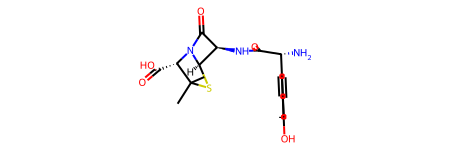

In [30]:
amoxicillin = AllChem.RemoveHs(amox_H)
amoxicillin

# 1.5 Output de Molècules

RDKit permet exportar molècules a arxius en els formats més habituals (smiles, sdf, mol, inchi o inchikey)

+ **Exportar a `SDF`**

> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> Inclourà les propietats que hem emmagatzemat per a la molècula

In [37]:
outfile = Chem.SDWriter('amoxicillin_new.sdf')
outfile.write(amoxicillin)
outfile.close()

+ **Exportar a `MOL`**

In [38]:
outfile = open('amoxicillin_new.mol', 'w')
outfile.write(Chem.MolToMolBlock(amoxicillin))
outfile.close()

+ **Exportar a `SMILES`**

> <img src="https://icon-library.com/images/tip-icon/tip-icon-23.jpg" alt="tip" width="30"/> Els arxius amb SMILES acostumen a tenir primer el smile, seguit d'un tabulador i el nom corresponent a la molècula per a identificar-la

In [39]:
#Opció 1
with open('amoxicillin_new.smi', 'w') as f:
    smi = Chem.MolToSmiles(amoxicillin)
    f.write("{}\t {} \n".format(smi, amoxicillin.GetProp("_Name"))) 

In [40]:
#Opció 2
w = Chem.SmilesWriter("amoxicillin_new.smi", delimiter='\t')
w.write(mol)
w.close()

+ **Exportar la imatge de la molècula**

In [41]:
Draw.MolToFile(amox_2d,'amoxicillin.png')

## **Exercici 1**


**1. Llegeix l'arxiu `gliptines.sdf`**

In [62]:
#Podem llegir arxius que contenen un conjunt de molècules
gliptines_3d = Chem.SDMolSupplier('./gliptines.sdf')
gliptines_3d 

**2. Quantes molècules hi ha al sdf file?**

In [43]:
print("Nombre de molècules a l'arxiu SDF:", len(gliptines_3d))

Nombre de molècules a l'arxiu SDF: 11


**3. Quin nom tenen cadascuna de les molècules?**

In [63]:
#glis = [mol for mol in Chem.SDMolSupplier("./gliptines.sdf")]
names = []
for gli in gliptines_3d:
    name = gli.GetProp('_Name')
    names.append(name)
print(names)

['vildagliptin', 'trelagliptin', 'teneligliptin', 'sitagliptin', 'saxagliptin', 'linagliptin', 'gemigliptin', 'anagliptin', 'alogliptin', 'evogliptin', 'carmegliptin']


**4. Quant pesa la molècula més gran (calcula el pes molecular)? De quina gliptina es tracta?**

In [60]:
# Calcula el pes molecular de cada molécula
weights = [Descriptors.MolWt(gli) for gli in glis]

# Troba l'index de la molécula amb el pes molecular mes gran
max_weight_index = weights.index(max(weights))

# Troba la gliptina corresponent
max_weight_gliptin = glis[max_weight_index].GetProp('_Name')

print("La gliptina amb el pes molecular més gran és: " + max_weight_gliptin + ", amb un pes molecular de: " + str(max(weights)))

La gliptina amb el pes molecular més gran és: gemigliptin, amb un pes molecular de: 489.36700000000013


**5. Passa les molècules que es troben en format `SDF` a `InchiKey`**

In [65]:
for gli in gliptines_3d:
    if gli is not None:  # Serveix per assegurar que s'ha llegit correctament
        name = gli.GetProp('_Name')
        inchi = Chem.MolToInchi(gli)
        inchikey = Chem.InchiToInchiKey(inchi)
        print(f"Nom: {name}, InChIKey: {inchikey}")

Nom: vildagliptin, InChIKey: SYOKIDBDQMKNDQ-XWTIBIIYSA-N
Nom: trelagliptin, InChIKey: IWYJYHUNXVAVAA-OAHLLOKOSA-N
Nom: teneligliptin, InChIKey: WGRQANOPCQRCME-PMACEKPBSA-N
Nom: sitagliptin, InChIKey: MFFMDFFZMYYVKS-SECBINFHSA-N
Nom: saxagliptin, InChIKey: QGJUIPDUBHWZPV-SGTAVMJGSA-N
Nom: linagliptin, InChIKey: LTXREWYXXSTFRX-QGZVFWFLSA-N
Nom: gemigliptin, InChIKey: ZWPRRQZNBDYKLH-VIFPVBQESA-N
Nom: anagliptin, InChIKey: LDXYBEHACFJIEL-HNNXBMFYSA-N
Nom: alogliptin, InChIKey: ZSBOMTDTBDDKMP-OAHLLOKOSA-N
Nom: evogliptin, InChIKey: LCDDAGSJHKEABN-MLGOLLRUSA-N
Nom: carmegliptin, InChIKey: GUYMHFIHHOEFOA-ZCPGHIKRSA-N


**6. Afegeix un nou camp a les propietats de cadascuna de les molècules que correspongui al valor de `LogP`**

In [75]:
gliptines_logP = []
for gli in gliptines_3d:
    if gli is not None:
        logp = Descriptors.MolLogP(gli)
        gli.SetProp('LogP', str(logp))
        gliptines_logP.append((gli.GetProp('_Name'), logp))
for name, logp in gliptines_logP:
    print(f'Nom de la molècula: {name}, LogP: {logp}')

Nom de la molècula: vildagliptin, LogP: 1.1742799999999998
Nom de la molècula: trelagliptin, LogP: 0.5335800000000007
Nom de la molècula: teneligliptin, LogP: 1.5661200000000006
Nom de la molècula: sitagliptin, LogP: 2.0164999999999997
Nom de la molècula: saxagliptin, LogP: 1.1579799999999993
Nom de la molècula: linagliptin, LogP: 1.1474199999999997
Nom de la molècula: gemigliptin, LogP: 2.3740000000000006
Nom de la molècula: anagliptin, LogP: 0.6503000000000008
Nom de la molècula: alogliptin, LogP: 0.3944800000000006
Nom de la molècula: evogliptin, LogP: 1.5058999999999998
Nom de la molècula: carmegliptin, LogP: 1.5205999999999995


**7. Exporta a un nou arxiu `sdf` que contingui les gliptines en 3D i assegurat que aparegui el camp nou que hem afegit a l'apartat anterior**

In [76]:
outfile = Chem.SDWriter('gliptines_3d.sdf')

for gli in gliptines_3d:
    if gli is not None:
        # Afegim els hidrògens
        gli_H = AllChem.AddHs(gli)
        
        # Calculem les coordenades 3D
        AllChem.EmbedMolecule(gli_H)
        
        # Eliminem els hidrògens
        gli = AllChem.RemoveHs(gli_H)
        
        # Escrivim la molècula al fitxer de sortida
        outfile.write(gli)

outfile.close()


**8. Exporta a un arxiu que contingui els smiles (extensió `smi`) i els noms de les gliptines separat per un tabulador.**

In [77]:
with open('gliptines.smi', 'w') as f:
    for gli in gliptines_3d:
        if gli is not None:
            smi = Chem.MolToSmiles(gli)
            name = gli.GetProp('_Name')
            f.write(f'{smi}\t{name}\n')